# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
import logging
# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

635

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"

weather_df = pd.DataFrame({
   "City Name":[],
   "Country":[],
   "Latitude":[],
   "Longitude":[],
   "Date":[],
   "Temperature":[],
   "Humidity":[],
   "Wind Speed":[],
   "Clouds":[]
})
weather_df
#print(query_url)

print("""
                             Beginning Data Retrieval
--------------------------------------------------------------------------------
""")
count = 1


for i in range(len(cities)):
    try:
        query_url = f"{base_url}appid={api_keys.api_key}&q={cities[i]}&units=imperial"
        print(f"Processing Record {count} of Set 1 | {cities[i]}")
        
        response = requests.get(query_url)
        weather_json = response.json()
        
        citycountry = weather_json["sys"]["country"]
        citylat = weather_json["coord"]["lat"]
        citylon = weather_json["coord"]["lon"]
        citydate = time.strftime('%Y-%m-%d', time.localtime(weather_json["dt"]))
        citymaxtmp = weather_json["main"]["temp_max"]
        cityhumid = weather_json["main"]["humidity"]
        citywindspeed = weather_json["wind"]["speed"]
        citycloud = weather_json["clouds"]["all"]

        weather_df = weather_df.append({
            "City Name": cities[i],
            "Country": citycountry,
            "Latitude": citylat,
            "Longitude": citylon,
            "Date": citydate,
            "Temperature": citymaxtmp,
            "Humidity": cityhumid,
            "Wind Speed": citywindspeed,
            "Clouds": citycloud}, ignore_index=True)
        count+=1
    except:
        print("Insufficient data. Skipping..")
print("""
--------------------------------------------------------------------------------
                                Data Retrieval Complete
--------------------------------------------------------------------------------
""")


                             Beginning Data Retrieval
--------------------------------------------------------------------------------

Processing Record 1 of Set 1 | kimbe
Processing Record 2 of Set 1 | paslek
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | vila velha
Processing Record 5 of Set 1 | nemyriv
Processing Record 6 of Set 1 | sorong
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | mumford
Processing Record 10 of Set 1 | ngukurr
Insufficient data. Skipping..
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | tuktoyaktuk
Processing Record 12 of Set 1 | sistranda
Processing Record 13 of Set 1 | bathsheba
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | nikolskoye
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | dikson
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | cabo san lucas
Processing

Processing Record 163 of Set 1 | marcona
Insufficient data. Skipping..
Processing Record 163 of Set 1 | bayji
Processing Record 164 of Set 1 | saldanha
Processing Record 165 of Set 1 | ulladulla
Processing Record 166 of Set 1 | gelemso
Processing Record 167 of Set 1 | avarua
Processing Record 168 of Set 1 | muros
Processing Record 169 of Set 1 | bethel
Processing Record 170 of Set 1 | ocampo
Processing Record 171 of Set 1 | maryborough
Processing Record 172 of Set 1 | lowestoft
Processing Record 173 of Set 1 | gumdag
Processing Record 174 of Set 1 | lebu
Processing Record 175 of Set 1 | forio
Processing Record 176 of Set 1 | ossora
Processing Record 177 of Set 1 | port alfred
Processing Record 178 of Set 1 | kembe
Insufficient data. Skipping..
Processing Record 178 of Set 1 | henderson
Processing Record 179 of Set 1 | mattru
Processing Record 180 of Set 1 | shumskiy
Processing Record 181 of Set 1 | buon me thuot
Insufficient data. Skipping..
Processing Record 181 of Set 1 | sao felix d

Processing Record 320 of Set 1 | kelvington
Processing Record 321 of Set 1 | tongzi
Processing Record 322 of Set 1 | karaul
Insufficient data. Skipping..
Processing Record 322 of Set 1 | padang
Processing Record 323 of Set 1 | marbella
Processing Record 324 of Set 1 | tura
Processing Record 325 of Set 1 | yunyang
Processing Record 326 of Set 1 | steubenville
Processing Record 327 of Set 1 | fenoarivo
Processing Record 328 of Set 1 | dalby
Processing Record 329 of Set 1 | cascais
Processing Record 330 of Set 1 | haines junction
Processing Record 331 of Set 1 | yerofey pavlovich
Processing Record 332 of Set 1 | byron bay
Processing Record 333 of Set 1 | narsaq
Processing Record 334 of Set 1 | vastervik
Insufficient data. Skipping..
Processing Record 334 of Set 1 | chagda
Insufficient data. Skipping..
Processing Record 334 of Set 1 | asfi
Insufficient data. Skipping..
Processing Record 334 of Set 1 | benguela
Processing Record 335 of Set 1 | privolnaya
Processing Record 336 of Set 1 | era

Insufficient data. Skipping..
Processing Record 482 of Set 1 | saint anthony
Processing Record 483 of Set 1 | casian
Processing Record 484 of Set 1 | oranjemund
Processing Record 485 of Set 1 | nizwa
Processing Record 486 of Set 1 | iqaluit
Processing Record 487 of Set 1 | tevaitoa
Processing Record 488 of Set 1 | misratah
Processing Record 489 of Set 1 | lokomotivnyy
Processing Record 490 of Set 1 | roros
Processing Record 491 of Set 1 | palmaner
Processing Record 492 of Set 1 | varhaug
Processing Record 493 of Set 1 | duku
Processing Record 494 of Set 1 | lloydminster
Processing Record 495 of Set 1 | jalu
Processing Record 496 of Set 1 | gushikawa
Processing Record 497 of Set 1 | rock sound
Processing Record 498 of Set 1 | jovellar
Processing Record 499 of Set 1 | jurado
Insufficient data. Skipping..
Processing Record 499 of Set 1 | parana
Processing Record 500 of Set 1 | paris
Processing Record 501 of Set 1 | pangai
Processing Record 502 of Set 1 | kargil
Processing Record 503 of Se

In [4]:
weather_df

,City Name,Country,Latitude,Longitude,Date,Temperature,Humidity,Wind Speed,Clouds
0,kimbe,PG,-5.56,150.15,2019-03-10,76.39,100.0,5.41,92.0
1,paslek,PL,54.06,19.66,2019-03-10,34.00,86.0,8.99,88.0
2,mataura,NZ,-46.19,168.86,2019-03-10,68.00,71.0,1.01,64.0
3,vila velha,BR,-3.71,-38.60,2019-03-10,77.00,94.0,2.24,40.0
4,nemyriv,UA,50.10,23.44,2019-03-10,46.40,70.0,13.42,75.0
5,sorong,ID,-0.86,131.25,2019-03-10,82.96,98.0,5.97,88.0
6,yellowknife,CA,62.45,-114.38,2019-03-10,14.00,78.0,4.70,75.0
7,puerto ayora,EC,-0.74,-90.35,2019-03-10,79.04,97.0,8.99,0.0
8,mumford,GH,5.26,-0.76,2019-03-10,78.14,92.0,4.41,12.0
9,busselton,AU,-33.64,115.35,2019-03-10,73.00,44.0,10.22,0.0


In [5]:
weather_df.describe()

,Latitude,Longitude,Temperature,Humidity,Wind Speed,Clouds
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,20.721021,16.447042,54.627746,77.522887,7.596602,40.809859
std,32.743994,88.216952,25.047839,19.279697,5.550971,35.693025
min,-54.810000,-179.170000,-22.010000,15.000000,0.270000,0.000000
25%,-3.742500,-59.677500,36.000000,67.000000,3.360000,0.000000
50%,23.210000,18.690000,59.000000,82.000000,5.820000,40.000000
75%,48.657500,84.955000,75.902500,93.000000,10.290000,75.000000
max,78.220000,178.420000,100.990000,100.000000,42.430000,100.000000


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df.to_csv(r'cities.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

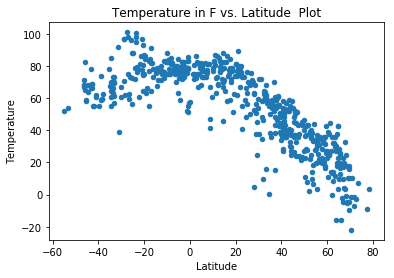

<Figure size 432x288 with 0 Axes>

In [12]:
lat_tmp_plt = weather_df.plot.scatter(x='Latitude', y='Temperature', title='Temperature in F vs. Latitude  Plot')
plt.show(lat_tmp_plt)

plt.savefig('Temperature vs Latitude.png')

#### Latitude vs. Humidity Plot

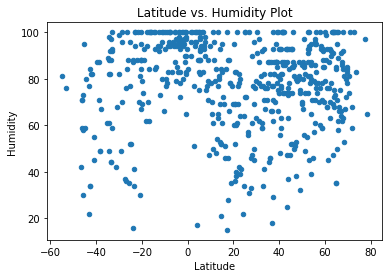

<Figure size 432x288 with 0 Axes>

In [8]:
lat_hum_plt = weather_df.plot.scatter(x='Latitude', y='Humidity', title="Latitude vs. Humidity Plot")
plt.show(lat_hum_plt)
plt.savefig('Latitude vs. Humidity.png')

#### Latitude vs. Cloudiness Plot

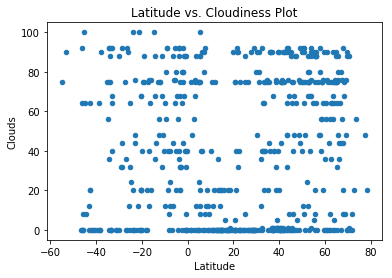

<Figure size 432x288 with 0 Axes>

In [9]:
lat_cld_plt = weather_df.plot.scatter(x='Latitude', y='Clouds', title='Latitude vs. Cloudiness Plot')
plt.show(lat_cld_plt)

plt.savefig('Latitude vs. Cloudiness.png')

#### Latitude vs. Wind Speed Plot

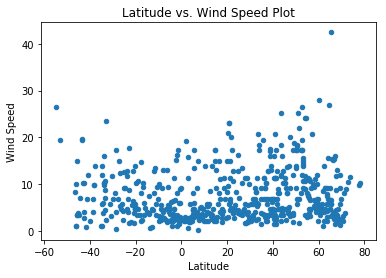

<Figure size 432x288 with 0 Axes>

In [10]:
lat_wspeed_plt = weather_df.plot.scatter(x='Latitude', y='Wind Speed', title='Latitude vs. Wind Speed Plot')
plt.show(lat_wspeed_plt)
plt.savefig('Latitude vs. Wind Speed.png')

SyntaxError: invalid syntax (<ipython-input-11-bd9667681aa3>, line 1)